In [129]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

sns.set_theme()

## Load the dataset

In [47]:
# Load the dataset
filename = "./data/raw/weatherAUS.csv"
df_raw = pd.read_csv(filename)

In [48]:
df_raw.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [49]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Notes:**
- Data with 145460 records and 23 attributes containing info about location, date and other weather features such as wind, clouds, rains, etc.
- There are 16 numeric attributes and 7 object attributes.
- Null values are present in the dataset.

In [50]:
df_raw.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Notes:**
- From the stats shown above, there are clear cases of attributes with outliers. For instance, Rainfall attribute, where the 75% of instances are below 0.8 but still got a mmax of 371. We can see the same scenario for Evaporation and some other more. 


In [51]:
# Lets check for the numerical attributes distribution
num_vars = [col for col in df_raw.columns if df_raw[col].dtype != "object"]
num_vars

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

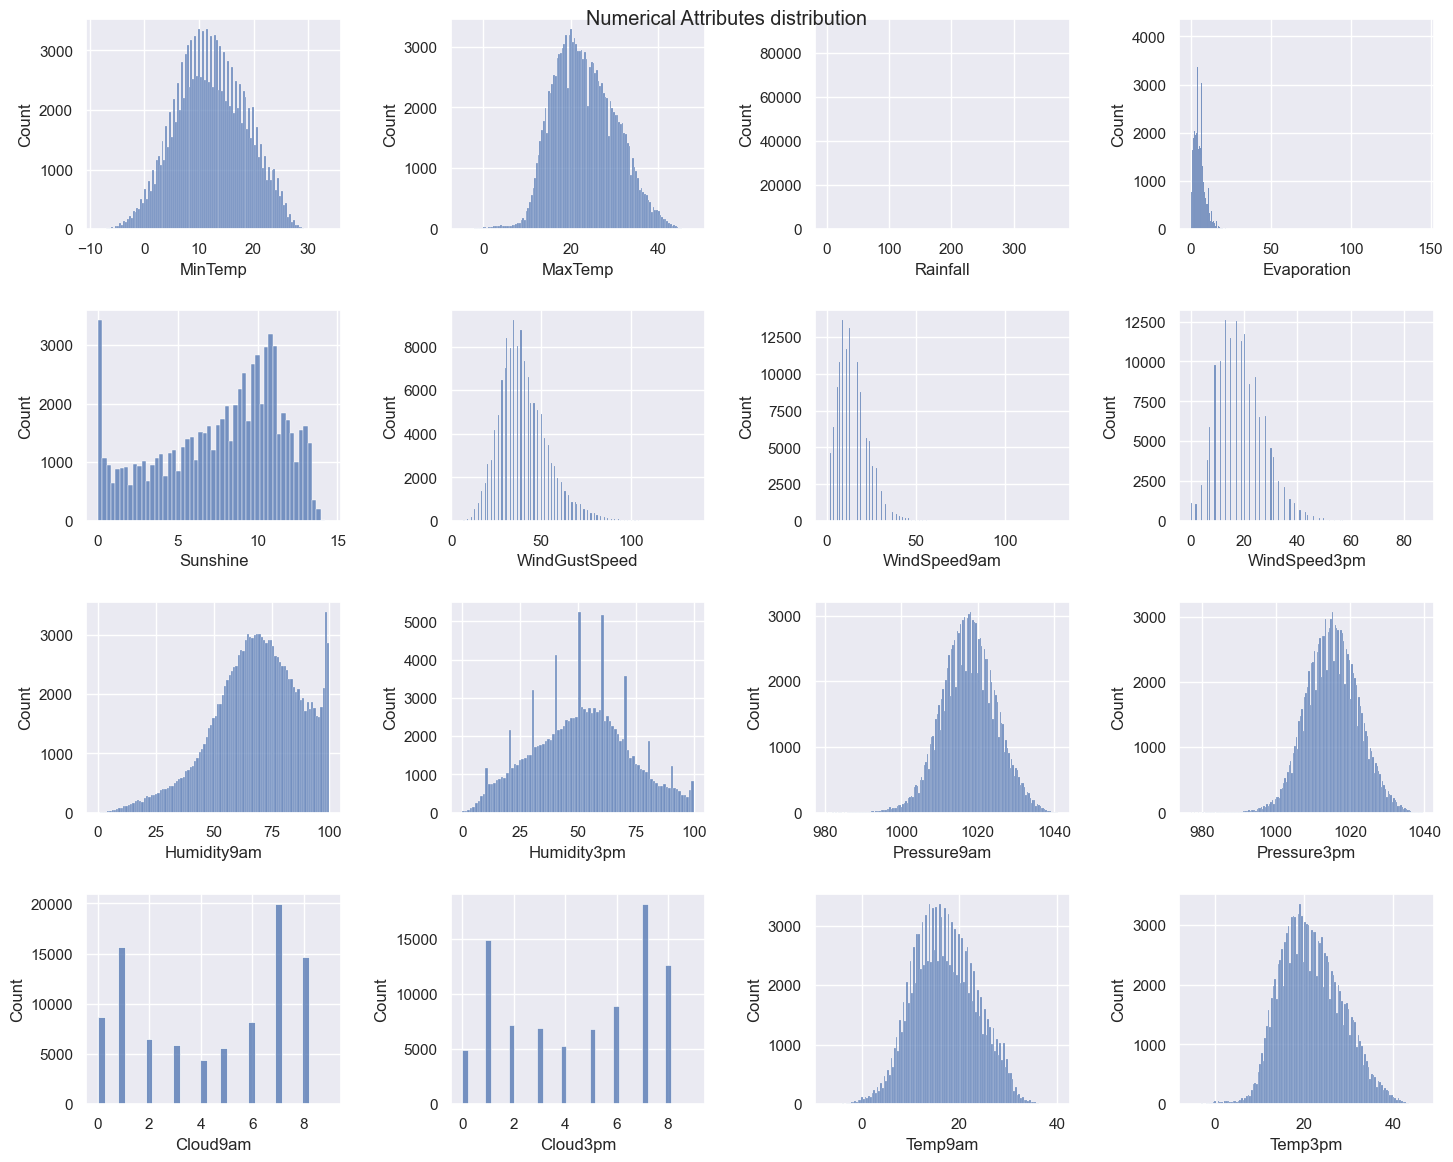

In [52]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
axes = axes.reshape(-1)

for i, col in enumerate(num_vars):
    sns.histplot(df_raw[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.suptitle('Numerical Attributes distribution')
plt.savefig("./figs/distributions.png")
plt.show()

**Notes:**
- Most of the variables follow a normal distribution.
- Rainfall variable appear to have some issues when ploting, most likely due to the presence of outliers. Outliers may also be affecting Evaporation as it appears in the plot.
- Due to Australia's variety of climates, we can see wide ranges in MinTemps and MaxTemps. Territories such as Victoria, are usually colder than tropical territories like Northern Territory. Therefore, these differences of climates across regions make the distributions much wider.


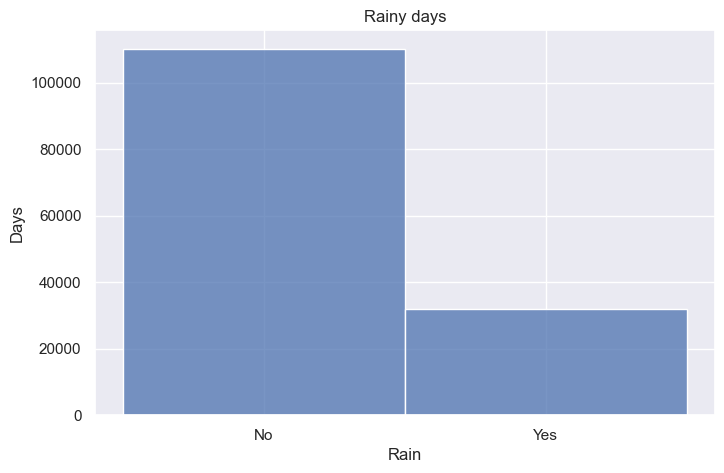

In [53]:
plt.figure(figsize= (8,5))
sns.histplot(df_raw["RainToday"])
plt.title("Rainy days")
plt.ylabel("Days")
plt.xlabel("Rain")
plt.savefig("./figs/Rainy_days_distr.png")
plt.show()

**Notes:**
- As shown in the histogram, the non rainy days outnumbers the rainy days in Australia.
- From here we can sense the presence of unbalanced data. 

In [54]:
locations = df_raw["Location"].unique()
print(f"There are {len(locations)} different locations.")

There are 49 different locations.


I'm going to map No as 0 and Yes as 1 for easier manipulation for RainToday.

In [55]:
df_raw["RainToday"] = df_raw["RainToday"].map({"Yes":1, "No":0})

Let's analyze how rain distributes across regions.

In [56]:
# Group by Location and sum RainToday values
grouped_locations= df_raw.groupby(by ='Location')["RainToday"].sum().reset_index()

In [57]:
grouped_locations.head()

,Location,RainToday
0,Adelaide,689.0
1,Albany,902.0
2,Albury,617.0
3,AliceSprings,244.0
4,BadgerysCreek,583.0


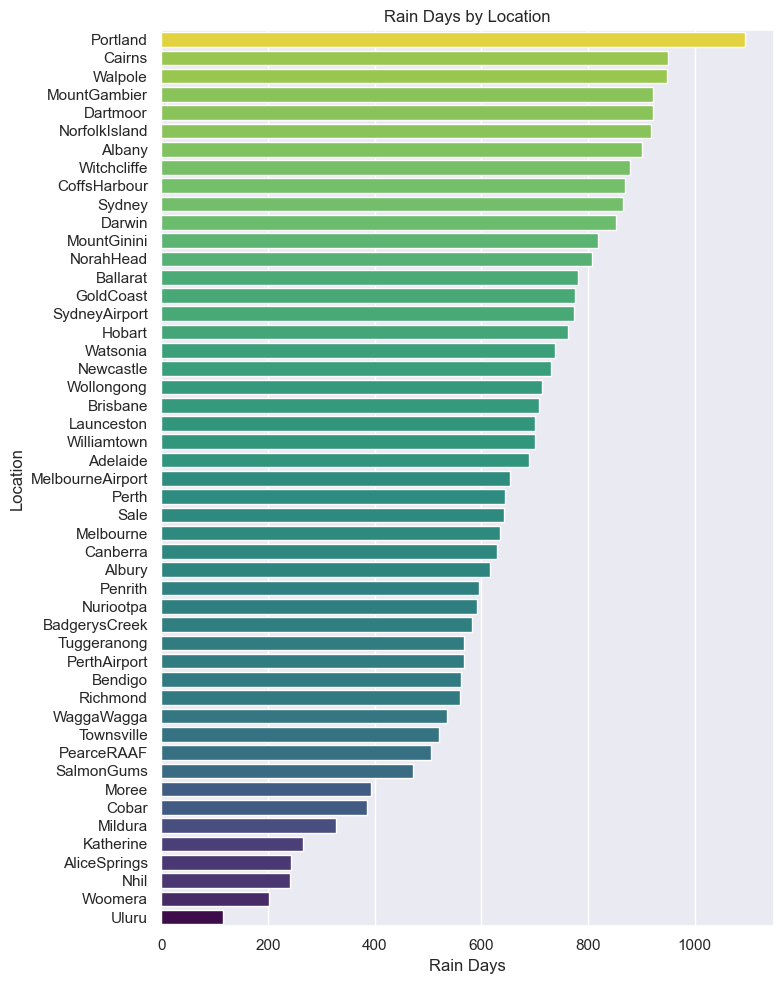

In [58]:
# Plot the results. 
sorted_locs = grouped_locations.sort_values(by="RainToday", ascending = False) # Sort the results
plt.figure(figsize=(8, 10))
sns.barplot(data = sorted_locs, x= "RainToday", y= "Location", hue="RainToday", palette="viridis", legend=False)
plt.title("Rain Days by Location")
plt.xlabel("Rain Days")
plt.tight_layout()
plt.savefig("./figs/rain_by_locations.png")
plt.show()

**Notes:**
- As observed, Portland is the city with most Rainy days over the last years and Uluru presents the lowest rain levels of all locations.
- This chart provides us with the sense that Location may be a very relevant feature when making predictions. 

After analyzing the weather from a Location context, let's jump to a time context and see how rain has evolved during the years and check for any seasonality, which would be expected as there are regions with dry and wet seasons, speccialy in the north.

In [59]:
df_raw.Date

0         2008-12-01
1         2008-12-02
2         2008-12-03
3         2008-12-04
4         2008-12-05
             ...    
145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, Length: 145460, dtype: object

In [60]:
df_raw["Year"] = df_raw["Date"].apply(lambda x: int(str(x)[:4]))
df_raw["Year"].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [61]:
grouped_by_year = df_raw.groupby(by = "Year")["RainToday"].mean()
grouped_by_year

Year
2007    0.311475
2008    0.229399
2009    0.216645
2010    0.244124
2011    0.246942
2012    0.225620
2013    0.215231
2014    0.204276
2015    0.211873
2016    0.238734
2017    0.208122
Name: RainToday, dtype: float64

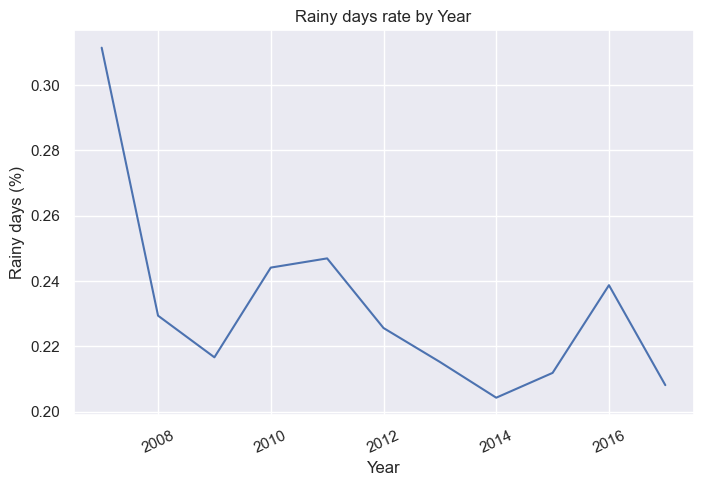

In [62]:
plt.figure(figsize= (8,5))
sns.lineplot(grouped_by_year)
plt.title("Rainy days rate by Year")
plt.ylabel("Rainy days (%)")
plt.xticks(rotation = 25)
plt.savefig("./figs/rain_trend_year.png")
plt.show()

**Notes:**
- Rainy days have slightly decreased since 2007 and has mantained a rain rate around 20% and 24% over the last years. 

In [63]:
df_raw["Month"] = df_raw["Date"].apply(lambda x: int(str(x)[5:7]))
df_raw["Month"].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [64]:
grouped_by_month = df_raw.groupby(by = "Month")["RainToday"].mean()
grouped_by_month

Month
1     0.189484
2     0.206746
3     0.217135
4     0.216845
5     0.222163
6     0.263638
7     0.270736
8     0.253167
9     0.229135
10    0.196512
11    0.210843
12    0.213037
Name: RainToday, dtype: float64

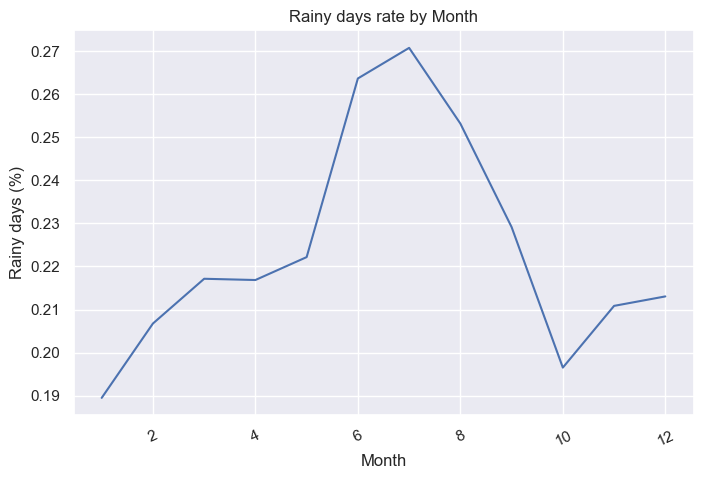

In [65]:
plt.figure(figsize= (8,5))
sns.lineplot(grouped_by_month)
plt.title("Rainy days rate by Month")
plt.ylabel("Rainy days (%)")
plt.xticks(rotation = 25)
plt.savefig("./figs/rain_trend_months.png")
plt.show()

**Notes:**
- This plot suggest that rain in australia has a certain degree of seasonality. Rain days are more common between May and September, and they drop after October. This seasonality can strongly be noted in northern regions, where they experience a dry and wet season.

Let's keep analyzing and check for correlations between variables.

In [66]:
df_cor = df_raw.copy()

to_drop = ["Month", "Year"]
df_cor = df_cor.drop(columns = to_drop)

# Compute correlation matrix
cor_matrix = df_cor.corr(numeric_only = True)

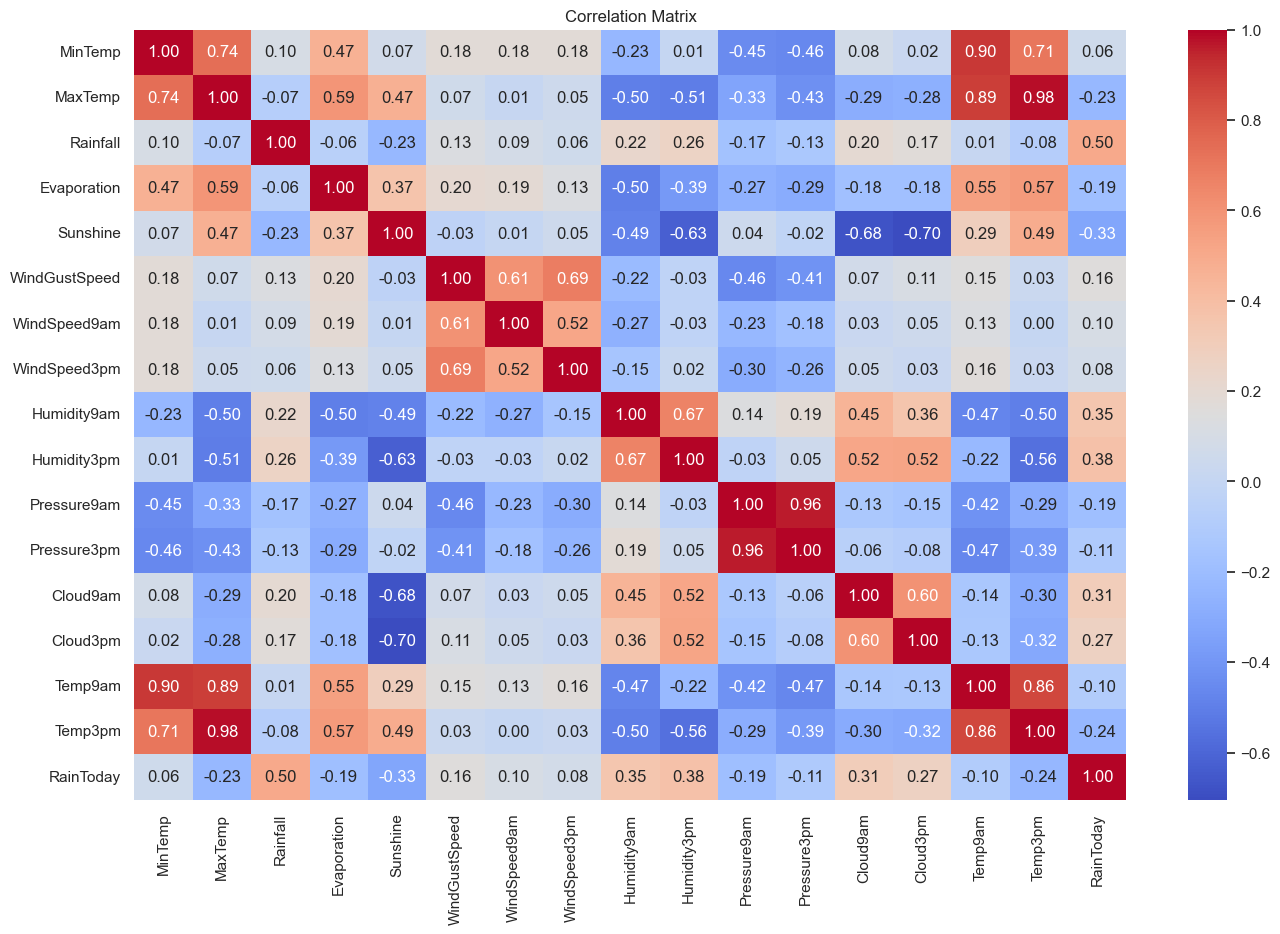

In [67]:
# Plot the matrix
plt.figure(figsize=(16, 10))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig("./figs/corr_matrix.png")
plt.show()

**Notes:**
- With this graph we are able to see the correlations between variables. We observe strong positive correlations and relatively strong negative correlations.
- Temperatures are highly correlated with their correlative variables. For instance, Temp9am is strongly correlated with MinTemp (0.9) an Temp3pm with MaxTemp (0.98).
- As for negative strong correlations, Cloud9am and Cloud3pm outstand from the rest. These two variables are strongly correlated with Sunshine (0.68 and 0.7 respectively) suggesting that the presence of clouds at 9am and 3pm reduce Sunshine.

# Preprocessing
In this section we are going to prepare and transform the data into an adequate format for later analysis and modeling.

### Null Values Treatment
In this section we will analyze the null values and impute them if convinient.

In [68]:
df_raw.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
dtype: int64

In [69]:
# Store column and nulls in a dict for plotting
nuls_dict = {}
for col in df_raw.columns:
    nuls_dict[col] = df_raw[col].isna().sum()

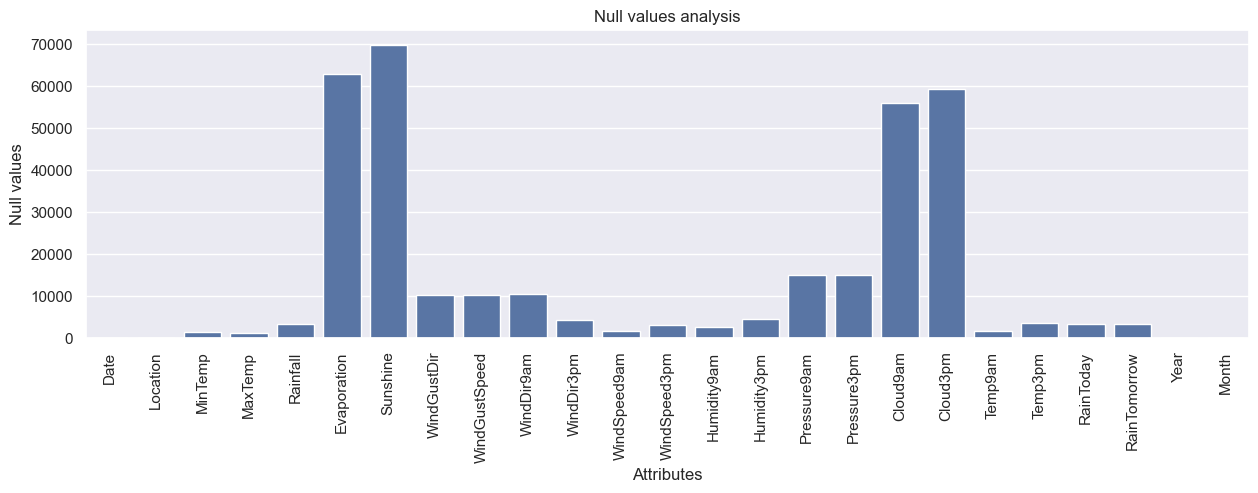

In [70]:
plt.figure(figsize=(15, 4))
sns.barplot(x = nuls_dict.keys(), y = nuls_dict.values())
plt.xlabel('Attributes')
plt.ylabel('Null values')
plt.xticks(rotation= 90)
plt.title('Null values analysis')
plt.show()

**Observations:**
- High number of null values in Evaporation, Sunshine, Cloud9am and Cloud3pm, around 40% of the observations are null.
- Still other columns contain some null values that should be treated.
  

For categorical values we will impute the data using the mode, as per standards. For numerical variables we will use the median for non normal behaviours and mean for normal distributed variables. 

In [71]:
df_imputed = df_raw.copy()
df_imputed = df_imputed.drop(columns = "RainTomorrow")  # Exclude target variable from imputations

In [72]:
# Select Cat variables with at least 1 null value
cat_vars_nulls = [col for col in df_imputed.columns if df_imputed[col].dtype == 'object' and df_imputed[col].isna().sum() > 0]
cat_vars_nulls

['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [73]:
# Impute cat variables by mode
for var in cat_vars_nulls: 
    mode = df_imputed[var].mode()
    df_imputed[var] = df_imputed[var].fillna(mode[0])

print("Results after imputation")
print("-"*80)
df_imputed[cat_vars_nulls].isna().sum()

Results after imputation
--------------------------------------------------------------------------------


WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [74]:
# Select null_num_vars
num_vars_nulls = [col for col in df_imputed.columns if df_imputed[col].dtype != 'object' and df_imputed[col].isna().sum() > 0]
num_vars_nulls

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

As seen earlier in the distributions graph, we can assume a normal distribution for all numerical attributes except Cloud 3pm, Cloud 9am and Evaporation, therefore we will impute their null values using the median.

In [75]:
# Impute numerical variables with mean
median_cols = ["Cloud9am", "Cloud3pm", "Evaporation"]

for var in median_cols:
    df_imputed[var] = df_imputed[var].fillna(df_imputed[var].median())

# Impute numerical variables with median
mean_cols = [col for col in num_vars if col not in median_cols]

for var in mean_cols:
    df_imputed[var] = df_imputed[var].fillna(df_imputed[var].mean())

print("Results after imputation")
print("-"*80)
df_imputed[num_vars].isna().sum()

Results after imputation
--------------------------------------------------------------------------------


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

Treating null variables for the target variable could add some bias to the results of the prediction models, therefore I am going to filter out those records where the target variable is null.

In [76]:
df_imputed = pd.concat([df_imputed, df_raw["RainTomorrow"].reset_index(drop = True)], axis = 1)

In [77]:
df_imputed = df_imputed.dropna(axis = 0, subset = ["RainTomorrow"])
df_imputed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,7.611178,W,44.0,W,...,1007.7,1007.1,8.0,5.0,16.9,21.8,0.0,2008,12,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,7.611178,WNW,44.0,NNW,...,1010.6,1007.8,5.0,5.0,17.2,24.3,0.0,2008,12,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,7.611178,WSW,46.0,W,...,1007.6,1008.7,5.0,2.0,21.0,23.2,0.0,2008,12,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,7.611178,NE,24.0,SE,...,1017.6,1012.8,5.0,5.0,18.1,26.5,0.0,2008,12,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,7.611178,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,2008,12,No


In [78]:
print("Shape:", df_imputed.shape)
print("-"*50)
print("\nNULLS:")
print(df_imputed.isna().sum())

Shape: (142193, 25)
--------------------------------------------------

NULLS:
Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday        1406
Year                0
Month               0
RainTomorrow        0
dtype: int64


## Treatment of outliers
Now that the null values have been treated we can proceed to examine the outliers and treat them as necessary.

In [143]:
def compute_bounds(df):
    """
    Function to compute the thresholds for outliers based on 1.5 rule
    
    Arguments
    ---------
    df: Where to look for outliers, usually going to be an array
    
    Returns
    -------
    Lower and Upper bound
    """
    
    # Compute 1st and 3rd quantiles
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    # COmute Interquantile range
    IQR = q3-q1

    # Compute Lower and Upper limit
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)

    return lower_limit, upper_limit



def detect_outliers(df):
    """
    Function to detect outliers
    
    Arguments
    ---------
    df: Where to look for outliers, usually going to be an array
    
    Returns
    -------
    Rows where the values are outliers
    """

    lower_limit, upper_limit = compute_bounds(df)    

    outliers = df[(df < lower_limit) | (df > upper_limit)] 

    return outliers


In [146]:
outliers_dict = {}

for var in num_vars:
    outliers_dict[var] = len(detect_outliers(df_imputed[var]))

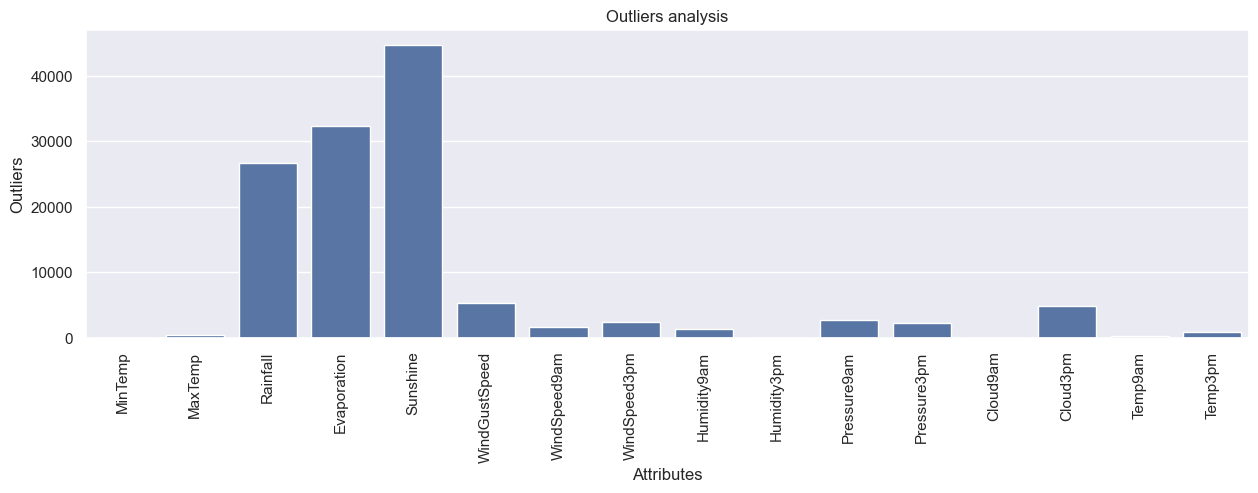

In [147]:
plt.figure(figsize=(15, 4))
sns.barplot(x = outliers_dict.keys(), y = outliers_dict.values())
plt.xlabel('Attributes')
plt.ylabel('Outliers')
plt.xticks(rotation= 90)
plt.title('Outliers analysis')
plt.show()

**Observations:**
- High number of outlier values in Rainfall, Evaporation and Sunshine. We have seen in the first part of the project that there were no negative values whatsoever, therefore correspond to atypical high values of Sunshine, Evaporation and Rainfall. 
- When working with weather data, it can be possible that these extreme values correspond to specific ocasions when the weather has become extreme. Moreover, due to climate change, it can become more often that we see these shifts into extreme weather conditions. 

There are several options when it comes to outliers' treatment; these include logarithmic transformations, removing them, impute with robust estimators, etc. For the purpose of this project, I will proceed with Winzorisation, a capping technique where the very extreme values are set to the value of the threshold specified. 

Other acceptable options in this case could be a logarithmic transformaton because the outliers are positive or a Box-Cox transformation might as well work.

In [152]:
for var in num_vars:
    df_imputed[var] = winsorize(df_imputed[var], limits = [0, 0.05]) # Capping top 5% outliers